In [ ]:
                                      Credit defaulters and non defaulters predictor

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\Administrator\\Desktop\\data science datasets\\credit card defaulters.csv") #read in the data

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.drop(['ID'], axis=1) #drop ID column

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
X=np.asarray(df[['LIMIT_BAL', 'MARRIAGE', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',	'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',	'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',	'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
]]) 
X

array([[ 20000,      1,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      2,      1, ...,   4200,   2000,   3100],
       [ 80000,      1,      1, ...,   1926,  52964,   1804],
       [ 50000,      1,      1, ...,   1000,   1000,   1000]])

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) #feature scalling
X[0:5]

array([[-1.13672015, -1.05729503,  0.81016074,  0.18582826, -1.24601985,
         1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076, -0.64250107, -0.64739923, -0.66799331, -0.67249727,
        -0.66305853, -0.65272422, -0.34194162, -0.22708564, -0.29680127,
        -0.30806256, -0.31413612, -0.29338206],
       [-0.3659805 ,  0.85855728,  0.81016074,  0.18582826, -1.02904717,
        -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.65921875, -0.66674657, -0.63925429, -0.62163594,
        -0.60622927, -0.59796638, -0.34194162, -0.21358766, -0.24000461,
        -0.24422965, -0.31413612, -0.18087821],
       [-0.59720239,  0.85855728,  0.81016074,  0.18582826, -0.16115646,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.29855966, -0.49389911, -0.48240819, -0.44973025,
        -0.41718767, -0.39162956, -0.25029158, -0.19188673, -0.24000461,
        -0.24422965, -0.2486

In [8]:
Y=np.asarray(df['default payment next month'])
Y[0:24] #target variable

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [9]:
# Check the distribution to see whether your classes are imbalanced or not

print(df[['default payment next month']].value_counts(normalize=True))  

default payment next month
0                             0.7788
1                             0.2212
Name: proportion, dtype: float64


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) #Split into training and testing sets

In [11]:
# Apply SMOTE only to the training set

smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

In [12]:
# Train logistic regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, Y_train_res)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test) # model predictions

print(y_pred[0:10])

[0 0 1 0 0 0 0 0 0 0]


In [14]:
y_proba = model.predict_proba(X_test)[:, 1]

print(y_proba) 

[0.30239239 0.36808179 0.51237467 ... 0.35328559 0.35826507 0.14550321]


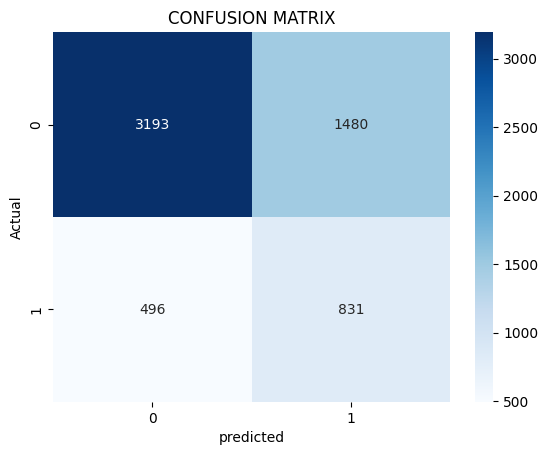

In [15]:
import seaborn as sns


cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('CONFUSION MATRIX')
plt.show()

In [16]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.65      0.61      6000
weighted avg       0.75      0.67      0.70      6000



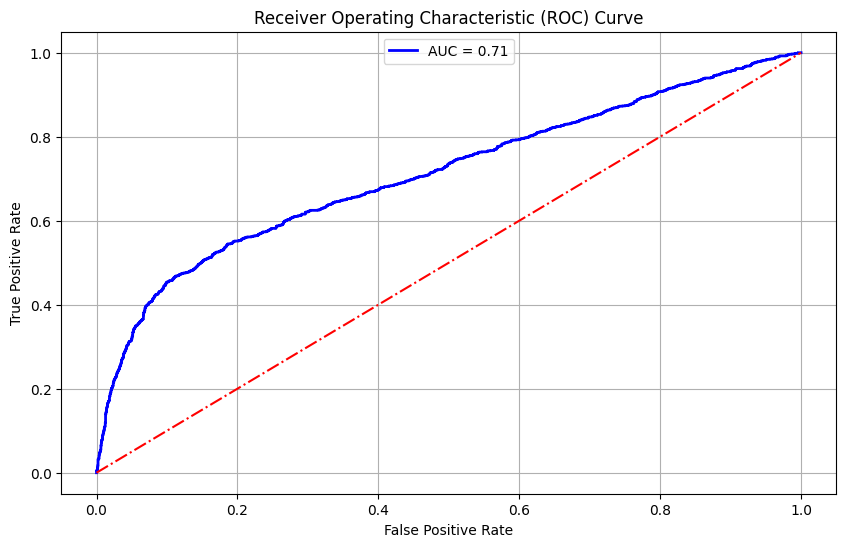

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score



y_proba = model.predict_proba(X_test)[:, 1] # Get predicted probabilities for the positive class (class 1)

fpr, tpr, thresholds = roc_curve(Y_test, y_proba) # Calculate False Positive Rate and True Positive Rate

auc_score = roc_auc_score(Y_test, y_proba) # Calculate AUC score

#Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue",linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="dashdot", color="red")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="upper center")
plt.grid(True)
plt.show()


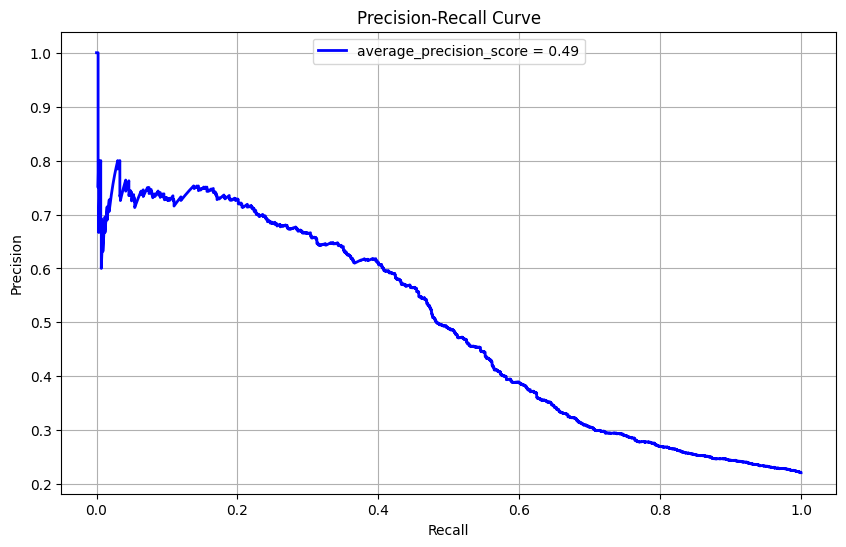

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score


y_scores = model.predict_proba(X_test)[:, 1]  #Probability scores from your model

precision, recall, _ = precision_recall_curve(Y_test, y_scores) #Compute precision and recall
ap_score = average_precision_score(Y_test, y_scores)

#plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision,label=f"average_precision_score = {ap_score:.2f}", color='blue', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper center")
plt.grid(True)
plt.show()
